<a href="https://colab.research.google.com/github/Dcorder123/Estudo_Dirigido_Controle_Automacao_2025.2/blob/main/Controle_e_Automa%C3%A7%C3%A3o_cap_13ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

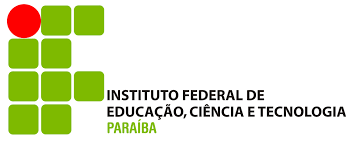

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: CONTROLE E AUTOMAÇÃO

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**ESTUDO DIRIGIDO DA DISCIPLINA: CONTROLE E AUTOMAÇÃO**

<br>

**Entrega 02**

<br>
<br>

Daniel Barbosa Vasconcelos

<center>

<br>
<br>
<br>

27 de novembro de 2025 <br>
Campina Grande, PB

# Resumo Estruturado: Capítulo 13 - Sistemas de Controle Digital
### Fonte: Sistemas de Controle Modernos (Dorf & Bishop)

Até agora, trabalhamos no domínio contínuo (tempo $t$, frequência $s$). No entanto, na indústria moderna, a maioria dos controladores é implementada em computadores digitais. Este capítulo introduz as ferramentas para analisar e projetar sistemas onde os sinais são amostrados em intervalos de tempo discretos.



## 1. Introdução ao Controle Digital
Um sistema de controle digital utiliza um computador (ou microcontrolador) como o controlador. Isso envolve dois processos fundamentais de conversão de sinal:
* **Amostragem (A/D):** Converte um sinal contínuo $r(t)$ em uma sequência de números $r(kT)$ em instantes discretos, onde $T$ é o período de amostragem.
* **Retenção (D/A):** Converte a sequência de números de volta para um sinal contínuo para atuar na planta. O mais comum é o **Retentor de Ordem Zero (ZOH)**, que mantém o valor constante entre as amostras.

## 2. A Transformada Z
Assim como a Transformada de Laplace facilita a análise no domínio contínuo, a **Transformada Z** é a ferramenta matemática para sistemas discretos.

* **Definição:**
    $$F(z) = \mathcal{Z}\{f(kT)\} = \sum_{k=0}^{\infty} f(kT) z^{-k}$$
* **Relação com Laplace:** A variável $z$ está relacionada a $s$ pela equação:
    $$z = e^{sT}$$
    Onde $T$ é o período de amostragem.


## 3. Função de Transferência de Pulso $G(z)$
A função de transferência no domínio $z$ relaciona a saída amostrada $Y(z)$ com a entrada amostrada $U(z)$.
* Para um sistema com um retentor de ordem zero (ZOH) e uma planta $G_p(s)$, a função de transferência discreta é:
    $$G(z) = (1 - z^{-1}) \mathcal{Z} \left\{ \frac{G_p(s)}{s} \right\}$$


## 4. Mapeamento do Plano-s para o Plano-z
A estabilidade e o desempenho mudam de região geométrica ao passar de $s$ para $z$:

| Característica | Plano-s (Contínuo) | Plano-z (Discreto) |
| :--- | :--- | :--- |
| **Estabilidade** | Semi-plano esquerdo ($\sigma < 0$) | Interior do Círculo Unitário ($|z| < 1$) |
| **Fronteira de Estabilidade** | Eixo Imaginário ($j\omega$) | Círculo Unitário ($|z| = 1$) |
| **Instabilidade** | Semi-plano direito | Exterior do Círculo Unitário ($|z| > 1$) |
| **Amortecimento Constante** | Linhas radiais da origem | Espirais logarítmicas (curvas "coração") |

> **Nota Crítica:** O sistema é estável se todos os pólos da função de transferência em malha fechada $T(z)$ estiverem **dentro** do círculo unitário.


## 5. Análise de Estabilidade e Resposta
* **Critério de Jury:** Equivalente discreto ao critério de Routh-Hurwitz. Permite verificar a estabilidade analisando os coeficientes da equação característica $P(z) = 0$ sem calcular as raízes exatas.
* **Erro em Regime Estacionário:** Analisado usando o Teorema do Valor Final para $z$:
    $$\lim_{k \to \infty} e(kT) = \lim_{z \to 1} (1 - z^{-1}) E(z)$$


## 6. Projeto de Controladores Digitais
Existem duas abordagens principais para projetar o controlador digital $D(z)$:

1.  **Projeto via Emulação (Indireto):**
    * Projeta-se o controlador $G_c(s)$ no mundo contínuo (usando LGR ou Bode).
    * Converte-se $G_c(s)$ para $D(z)$ usando aproximações como:
        * **Tustin (Bilinear):** $s \approx \frac{2}{T} \frac{z-1}{z+1}$
        * **Diferença Backward:** $s \approx \frac{z-1}{Tz}$
2.  **Projeto Direto no Plano-z:**
    * Utiliza-se o LGR diretamente no plano-z. As regras de construção do LGR são as mesmas, mas a interpretação (regiões de estabilidade/amortecimento) muda conforme o círculo unitário.

### Controlador PID Digital
O PID clássico é implementado em software através de equações de diferenças.
* **Ação Proporcional:** $u[k] = K_p e[k]$
* **Ação Integral:** Soma acumulada dos erros passados.
* **Ação Derivativa:** Diferença entre o erro atual e o anterior.

---
*Baseado no Capítulo 13 de Dorf, Richard C. & Bishop, Robert H. "Sistemas de Controle Modernos", 8ª Edição.*

###  Parte 02: Exemplos de Simulação (Python/Google Colab)

Abaixo estão os códigos para visualizar a **discretização** de sistemas contínuos e o efeito da **amostragem** na resposta.





#### Instalação

In [1]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ct

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 21.3 MB/s eta 0:00:00


#### Exemplo 1: Discretização e Mapeamento de Pólos (Plano-S vs Plano-Z)

**Objetivo:** Converter um sistema contínuo $G(s)$ para digital $G(z)$ e ver como os pólos estáveis (semi-plano esquerdo) vão para dentro do círculo unitário.


Sistema Contínuo G(s):
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        1
  -------------
  s^2 + 3 s + 2

Sistema Digital G(z) com T=0.5s:
<TransferFunction>: sys[0]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = 0.5

    0.07741 z + 0.04695
  -----------------------
  z^2 - 0.9744 z + 0.2231

Pólos Contínuos (s): [-2.+0.j -1.+0.j]
Pólos Digitais (z): [0.60653066+0.j 0.36787944+0.j]
Mapeamento Teórico (z = e^sT): [0.36787944+0.j 0.60653066+0.j]


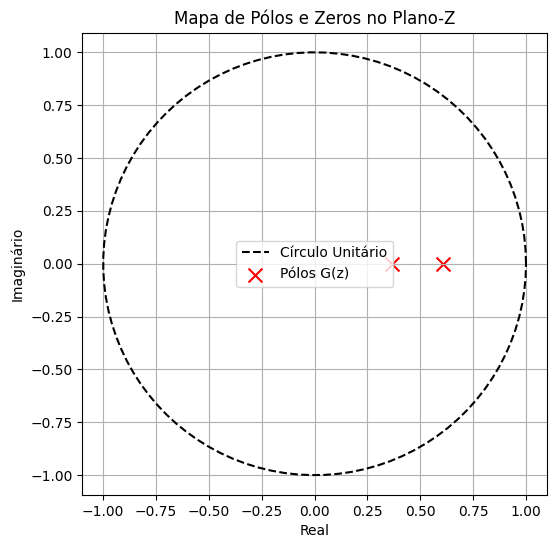

In [2]:
# 1. Definir o Sistema Contínuo (Planta)
# G(s) = 1 / (s + 1)(s + 2)
num = [1]
den = [1, 3, 2]
Gs = ct.tf(num, den)

print("Sistema Contínuo G(s):")
print(Gs)

# 2. Discretizar o Sistema (c2d)
# T = Tempo de Amostragem (quanto menor, mais fiel ao contínuo)
T = 0.5  # Segundos
Gz = ct.c2d(Gs, T, method='zoh') # Zero-Order Hold (Padrão)

print(f"\nSistema Digital G(z) com T={T}s:")
print(Gz)

# 3. Analisar os Pólos
polos_s = ct.poles(Gs)
polos_z = ct.poles(Gz)

print(f"\nPólos Contínuos (s): {polos_s}")
print(f"Pólos Digitais (z): {polos_z}")
print(f"Mapeamento Teórico (z = e^sT): {np.exp(polos_s * T)}")

# 4. Plotar Mapa de Pólos e Zeros (Plano-Z)
plt.figure(figsize=(6, 6))
# Desenha o círculo unitário
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', label='Círculo Unitário')

# Plota os pólos
plt.scatter(np.real(polos_z), np.imag(polos_z), marker='x', s=100, color='red', label='Pólos G(z)')
plt.title("Mapa de Pólos e Zeros no Plano-Z")
plt.xlabel("Real")
plt.ylabel("Imaginário")
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

# Conclusão: Se os pólos (x) estão DENTRO do círculo, o sistema digital é estável.

#### Exemplo 2: Efeito do Tempo de Amostragem na Resposta

**Objetivo:** Comparar a resposta ao degrau do sistema contínuo "perfeito" com versões digitais de diferentes taxas de amostragem. Isso mostra o problema de escolher um $T$ muito grande.

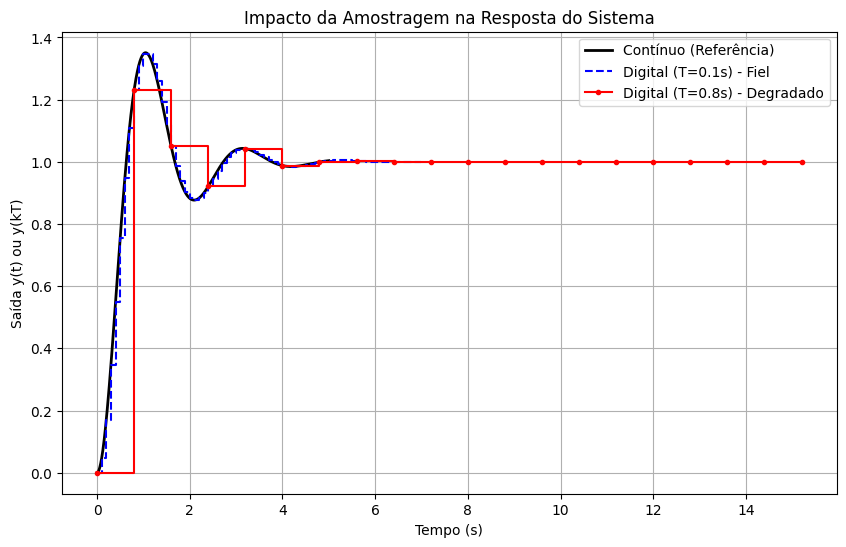

In [3]:
# Sistema: G(s) = 10 / (s^2 + 2s + 10)  (Subamortecido)
Gs = ct.tf([10], [1, 2, 10])

# Tempos de simulação
t_cont = np.linspace(0, 5, 1000)

# Discretização com dois tempos diferentes
T1 = 0.1  # Rápido (10Hz) - Bom
T2 = 0.8  # Lento (~1.2Hz) - Ruim
Gz1 = ct.c2d(Gs, T1)
Gz2 = ct.c2d(Gs, T2)

# Respostas ao Degrau
t_c, y_c = ct.step_response(Gs, t_cont)
t_z1, y_z1 = ct.step_response(Gz1)
t_z2, y_z2 = ct.step_response(Gz2)

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(t_c, y_c, 'k-', linewidth=2, label='Contínuo (Referência)')
plt.step(t_z1, y_z1, 'b--', where='post', label=f'Digital (T={T1}s) - Fiel')
plt.step(t_z2, y_z2, 'r.-', where='post', label=f'Digital (T={T2}s) - Degradado')

plt.title("Impacto da Amostragem na Resposta do Sistema")
plt.xlabel("Tempo (s)")
plt.ylabel("Saída y(t) ou y(kT)")
plt.grid()
plt.legend()
plt.show()



###  Parte 03: Aplicações Industriais (Indústria 4.0)

O controle digital é a base de toda a automação moderna. Aqui está como o Capítulo 13 se conecta com tecnologias atuais:

1.  **Sistemas Embarcados e IoT (Internet das Coisas):**

      * **Aplicação:** Sensores inteligentes e microcontroladores (como ESP32, Arduino industrial) controlando processos locais.
      * **Conexão com a Teoria:** Esses dispositivos têm poder de processamento limitado. O engenheiro usa a **Transformada Z** para converter equações diferenciais complexas em **equações de diferenças** simples (somas e multiplicações) que o processador consegue calcular em milissegundos.

2.  **Controle via Rede (Networked Control Systems - NCS):**

      * **Aplicação:** Fábricas onde o controlador está na nuvem (Cloud) ou em um servidor central, enviando comandos para robôs via 5G ou Wi-Fi industrial.
      * **O Desafio:** A rede introduz atrasos e perda de pacotes. Isso equivale a um tempo de amostragem $T$ variável ou muito grande. A análise no **Plano-Z** é crucial para garantir que, mesmo com "lags" da rede, os pólos do sistema não saiam do círculo unitário, evitando que o robô fique instável ou perigoso.

3.  **Impressão 3D e CNC de Alta Precisão:**

      * **Aplicação:** O movimento dos eixos de uma impressora 3D não é perfeitamente contínuo; é feito em "passos" digitais (motores de passo ou servos digitais).
      * **Conexão:** O controle de posição é projetado no domínio digital para sincronizar perfeitamente os eixos X, Y e Z. O **Retentor de Ordem Zero (ZOH)** modela exatamente como o driver do motor mantém a corrente constante entre um comando e outro do microprocessador.